# Goodのデータ

In [2]:
library(lda)
library(stringr)
library(ggplot2)
library(gridExtra)
library(pforeach)
library(slackr)
slackr_setup()
source('/Users/kosuke/研究/code/nikkei/LDA.R')
options(warn=-1)

In [3]:
data <- read.csv("/Users/kosuke/研究/code/airport/airport_review_complete.csv", stringsAsFactors=F)
review <- read.csv("/Users/kosuke/研究/code/airport/morphed_text.csv", stringsAsFactors=F)
data$month <- as.Date(apply(as.data.frame(data$datetime), 1, get_monthly))
data$year <- as.Date(apply(as.data.frame(data$datetime), 1, get_year))
data$review <- review
target_data <- data[data$month >= '2012-01-01',]
target_review <- target_data$review

In [4]:
rec_target_data <- target_data[target_data$Recommend == "yes",]
rec_target_review <- rec_target_data$review

## LDAの実行

In [5]:
bow <- lexicalize(rec_target_review$text)
word_count <- word.counts(bow$documents)
vocab <- bow$vocab[word_count > 0]
doc <- lexicalize(rec_target_review$text, vocab = vocab)

#### 語彙数

In [97]:
length(vocab)

[1] 7325

#### 総単語数

In [98]:
sum(sapply(doc, ncol))

[1] 125593

In [99]:
sum(sapply(doc, ncol)) / length(doc)

[1] 44.64735

In [124]:
gg_loglik <- function(result, K){
	p = ggplot(data.frame(result), aes(x = K, y = result))
	p = p + geom_line(size=0.1)
    p = p + geom_point(shape=1, size=1)
	p = p + xlab("トピック数") + ylab("周辺尤度")
	p = p + theme_bw()
    p <- p + theme(
            axis.title.x = element_text(size = 6),
            axis.title.y = element_text(size = 6),
            axis.text.x = element_text(size = 4),
            axis.text.y = element_text(size = 4))
   p
   ggsave(file = "/Users/kosuke/研究/pic/good_likelihood.pdf", plot = p, dpi = 100,family="Japan1GothicBBB", width = 3.5, height = 1.5)
}
gg_loglik(result, K)

    user   system  elapsed 
7699.086   34.089 7473.913 

Warning message in grid.Call(L_stringMetric, as.graphicsAnnot(x$label)):
“ 文字 0x1d に対するフォントメトリックスが未知です ”Warning message in grid.Call(L_stringMetric, as.graphicsAnnot(x$label)):
“ 文字 0x1d に対するフォントメトリックスが未知です ”Warning message in grid.Call(L_stringMetric, as.graphicsAnnot(x$label)):
“ 文字 0x1d に対するフォントメトリックスが未知です ”Warning message in grid.Call(L_stringMetric, as.graphicsAnnot(x$label)):
“ 文字 0x1d に対するフォントメトリックスが未知です ”Warning message in grid.Call(L_stringMetric, as.graphicsAnnot(x$label)):
“ 文字 0x1d に対するフォントメトリックスが未知です ”Warning message in grid.Call(L_stringMetric, as.graphicsAnnot(x$label)):
“ 文字 0x1a に対するフォントメトリックスが未知です ”Warning message in grid.Call(L_stringMetric, as.graphicsAnnot(x$label)):
“ 'mbcsToSbcs' 中の 'トピックス数' で変換に失敗: <e3> をドットで置き換えました ”Warning message in grid.Call(L_stringMetric, as.graphicsAnnot(x$label)):
“ 'mbcsToSbcs' 中の 'トピックス数' で変換に失敗: <83> をドットで置き換えました ”Warning message in grid.Call(L_stringMetric, as.graphicsAnnot(x$label)):
“ 'mbcsToSbcs' 中の 'トピックス数' で変換に失敗: <88> をドットで置き換え

“ 文字 0x1a に対するフォントメトリックスが未知です ”Warning message in grid.Call(L_stringMetric, as.graphicsAnnot(x$label)):
“ 文字 0x1d に対するフォントメトリックスが未知です ”Warning message in grid.Call(L_stringMetric, as.graphicsAnnot(x$label)):
“ 文字 0x7f に対するフォントメトリックスが未知です ”Warning message in grid.Call(L_stringMetric, as.graphicsAnnot(x$label)):
“ 文字 0x1b に対するフォントメトリックスが未知です ”Warning message in grid.Call(L_stringMetric, as.graphicsAnnot(x$label)):
“ 文字 0x18 に対するフォントメトリックスが未知です ”Warning message in grid.Call(L_stringMetric, as.graphicsAnnot(x$label)):
“ 文字 0x1b に対するフォントメトリックスが未知です ”Warning message in grid.Call(L_stringMetric, as.graphicsAnnot(x$label)):
“ 文字 0x1b に対するフォントメトリックスが未知です ”Warning message in grid.Call(L_stringMetric, as.graphicsAnnot(x$label)):
“ 文字 0x1d に対するフォントメトリックスが未知です ”Warning message in grid.Call(L_stringMetric, as.graphicsAnnot(x$label)):
“ 文字 0x7f に対するフォントメトリックスが未知です ”Warning message in grid.Call(L_stringMetric, as.graphicsAnnot(x$label)):
“ 文字 0x18 に対するフォントメトリックスが未知です ”Warning message in grid.Call(L_st

“ 'mbcsToSbcs' 中の '図3：トピックス数と周辺尤度の調和平均' で変換に失敗: <b9> をドットで置き換えました ”Warning message in grid.Call(L_stringMetric, as.graphicsAnnot(x$label)):
“ 'mbcsToSbcs' 中の '図3：トピックス数と周辺尤度の調和平均' で変換に失敗: <b3> をドットで置き換えました ”Warning message in grid.Call(L_stringMetric, as.graphicsAnnot(x$label)):
“ 'mbcsToSbcs' 中の '図3：トピックス数と周辺尤度の調和平均' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(L_stringMetric, as.graphicsAnnot(x$label)):
“ 'mbcsToSbcs' 中の '図3：トピックス数と周辺尤度の調和平均' で変換に失敗: <9d> をドットで置き換えました ”Warning message in grid.Call(L_stringMetric, as.graphicsAnnot(x$label)):
“ 'mbcsToSbcs' 中の '図3：トピックス数と周辺尤度の調和平均' で変換に失敗: <87> をドットで置き換えました ”Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ ポストスクリプトフォントのデータベースにフォントファミリ 'HiraKakuPro-W3' が見付かりません ”Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ ポストスクリプトフォントのデータベースにフォントファミリ 'HiraKakuPro-W3' が見付かりません ”Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ ポストスクリプトフ

“ ポストスクリプトフォントのデータベースにフォントファミリ 'HiraKakuPro-W3' が見付かりません ”Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ ポストスクリプトフォントのデータベースにフォントファミリ 'HiraKakuPro-W3' が見付かりません ”Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ ポストスクリプトフォントのデータベースにフォントファミリ 'HiraKakuPro-W3' が見付かりません ”Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ ポストスクリプトフォントのデータベースにフォントファミリ 'HiraKakuPro-W3' が見付かりません ”Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ ポストスクリプトフォントのデータベースにフォントファミリ 'HiraKakuPro-W3' が見付かりません ”Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ ポストスクリプトフォントのデータベースにフォントファミリ 'HiraKakuPro-W3' が見付かりません ”Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ ポストスクリプトフォントのデータベースにフォントファミリ 'HiraKakuPro-W3' が見付かりません ”Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ ポストスクリプトフォントのデータベー

“ ポストスクリプトフォントのデータベースにフォントファミリ 'HiraKakuPro-W3' が見付かりません ”Warning message in grid.Call.graphics(L_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ ポストスクリプトフォントのデータベースにフォントファミリ 'HiraKakuPro-W3' が見付かりません ”Warning message in grid.Call.graphics(L_text, as.graphicsAnnot(x$label), x$x, x$y, :
“ ポストスクリプトフォントのデータベースにフォントファミリ 'HiraKakuPro-W3' が見付かりません ”Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ ポストスクリプトフォントのデータベースにフォントファミリ 'HiraKakuPro-W3' が見付かりません ”Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ ポストスクリプトフォントのデータベースにフォントファミリ 'HiraKakuPro-W3' が見付かりません ”Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ ポストスクリプトフォントのデータベースにフォントファミリ 'HiraKakuPro-W3' が見付かりません ”Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ ポストスクリプトフォントのデータベースにフォントファミリ 'HiraKakuPro-W3' が見付かりません ”Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ ポストスクリプトフォント

ERROR: Error in eval(expr, envir, enclos):  関数 "text_slack" を見つけることができませんでした 


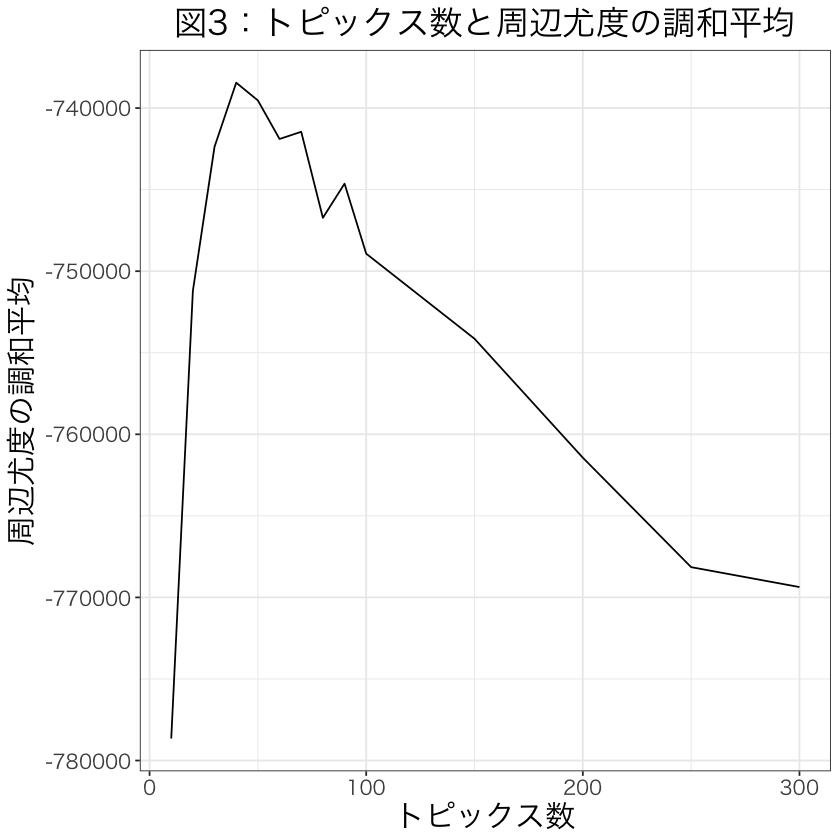

In [14]:
t = proc.time()
result <- pforeach(K = c(seq(10,100, by=10), 150, 200, 250, 300), .seed=123)({
		loglik_LDA(doc, vocab, K, iter=2000)
		})
proc.time()-t
K = c(seq(10,100, by=10), 150, 200, 250, 300)
gg_loglik(result, K)
text_slackr("学習しゅーりょー")

     user    system   elapsed 
15039.359    37.804 13660.352 

Warning message in grid.Call(L_stringMetric, as.graphicsAnnot(x$label)):
“ 文字 0x1d に対するフォントメトリックスが未知です ”Warning message in grid.Call(L_stringMetric, as.graphicsAnnot(x$label)):
“ 文字 0x1d に対するフォントメトリックスが未知です ”Warning message in grid.Call(L_stringMetric, as.graphicsAnnot(x$label)):
“ 文字 0x1d に対するフォントメトリックスが未知です ”Warning message in grid.Call(L_stringMetric, as.graphicsAnnot(x$label)):
“ 文字 0x1d に対するフォントメトリックスが未知です ”Warning message in grid.Call(L_stringMetric, as.graphicsAnnot(x$label)):
“ 文字 0x1d に対するフォントメトリックスが未知です ”Warning message in grid.Call(L_stringMetric, as.graphicsAnnot(x$label)):
“ 文字 0x1a に対するフォントメトリックスが未知です ”Warning message in grid.Call(L_stringMetric, as.graphicsAnnot(x$label)):
“ 'mbcsToSbcs' 中の 'トピックス数' で変換に失敗: <e3> をドットで置き換えました ”Warning message in grid.Call(L_stringMetric, as.graphicsAnnot(x$label)):
“ 'mbcsToSbcs' 中の 'トピックス数' で変換に失敗: <83> をドットで置き換えました ”Warning message in grid.Call(L_stringMetric, as.graphicsAnnot(x$label)):
“ 'mbcsToSbcs' 中の 'トピックス数' で変換に失敗: <88> をドットで置き換え

“ 文字 0x1a に対するフォントメトリックスが未知です ”Warning message in grid.Call(L_stringMetric, as.graphicsAnnot(x$label)):
“ 文字 0x1d に対するフォントメトリックスが未知です ”Warning message in grid.Call(L_stringMetric, as.graphicsAnnot(x$label)):
“ 文字 0x7f に対するフォントメトリックスが未知です ”Warning message in grid.Call(L_stringMetric, as.graphicsAnnot(x$label)):
“ 文字 0x1b に対するフォントメトリックスが未知です ”Warning message in grid.Call(L_stringMetric, as.graphicsAnnot(x$label)):
“ 文字 0x18 に対するフォントメトリックスが未知です ”Warning message in grid.Call(L_stringMetric, as.graphicsAnnot(x$label)):
“ 文字 0x1b に対するフォントメトリックスが未知です ”Warning message in grid.Call(L_stringMetric, as.graphicsAnnot(x$label)):
“ 文字 0x1b に対するフォントメトリックスが未知です ”Warning message in grid.Call(L_stringMetric, as.graphicsAnnot(x$label)):
“ 文字 0x1d に対するフォントメトリックスが未知です ”Warning message in grid.Call(L_stringMetric, as.graphicsAnnot(x$label)):
“ 文字 0x7f に対するフォントメトリックスが未知です ”Warning message in grid.Call(L_stringMetric, as.graphicsAnnot(x$label)):
“ 文字 0x18 に対するフォントメトリックスが未知です ”Warning message in grid.Call(L_st

“ 'mbcsToSbcs' 中の '図3：トピックス数と周辺尤度の調和平均' で変換に失敗: <b9> をドットで置き換えました ”Warning message in grid.Call(L_stringMetric, as.graphicsAnnot(x$label)):
“ 'mbcsToSbcs' 中の '図3：トピックス数と周辺尤度の調和平均' で変換に失敗: <b3> をドットで置き換えました ”Warning message in grid.Call(L_stringMetric, as.graphicsAnnot(x$label)):
“ 'mbcsToSbcs' 中の '図3：トピックス数と周辺尤度の調和平均' で変換に失敗: <e5> をドットで置き換えました ”Warning message in grid.Call(L_stringMetric, as.graphicsAnnot(x$label)):
“ 'mbcsToSbcs' 中の '図3：トピックス数と周辺尤度の調和平均' で変換に失敗: <9d> をドットで置き換えました ”Warning message in grid.Call(L_stringMetric, as.graphicsAnnot(x$label)):
“ 'mbcsToSbcs' 中の '図3：トピックス数と周辺尤度の調和平均' で変換に失敗: <87> をドットで置き換えました ”Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ ポストスクリプトフォントのデータベースにフォントファミリ 'HiraKakuPro-W3' が見付かりません ”Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ ポストスクリプトフォントのデータベースにフォントファミリ 'HiraKakuPro-W3' が見付かりません ”Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ ポストスクリプトフ

“ ポストスクリプトフォントのデータベースにフォントファミリ 'HiraKakuPro-W3' が見付かりません ”Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ ポストスクリプトフォントのデータベースにフォントファミリ 'HiraKakuPro-W3' が見付かりません ”Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ ポストスクリプトフォントのデータベースにフォントファミリ 'HiraKakuPro-W3' が見付かりません ”Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ ポストスクリプトフォントのデータベースにフォントファミリ 'HiraKakuPro-W3' が見付かりません ”Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ ポストスクリプトフォントのデータベースにフォントファミリ 'HiraKakuPro-W3' が見付かりません ”Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ ポストスクリプトフォントのデータベースにフォントファミリ 'HiraKakuPro-W3' が見付かりません ”Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ ポストスクリプトフォントのデータベースにフォントファミリ 'HiraKakuPro-W3' が見付かりません ”Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ ポストスクリプトフォントのデータベー

“ ポストスクリプトフォントのデータベースにフォントファミリ 'HiraKakuPro-W3' が見付かりません ”Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ ポストスクリプトフォントのデータベースにフォントファミリ 'HiraKakuPro-W3' が見付かりません ”Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ ポストスクリプトフォントのデータベースにフォントファミリ 'HiraKakuPro-W3' が見付かりません ”Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ ポストスクリプトフォントのデータベースにフォントファミリ 'HiraKakuPro-W3' が見付かりません ”Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ ポストスクリプトフォントのデータベースにフォントファミリ 'HiraKakuPro-W3' が見付かりません ”Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ ポストスクリプトフォントのデータベースにフォントファミリ 'HiraKakuPro-W3' が見付かりません ”Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ ポストスクリプトフォントのデータベースにフォントファミリ 'HiraKakuPro-W3' が見付かりません ”Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ ポストスクリプトフォントのデータベー

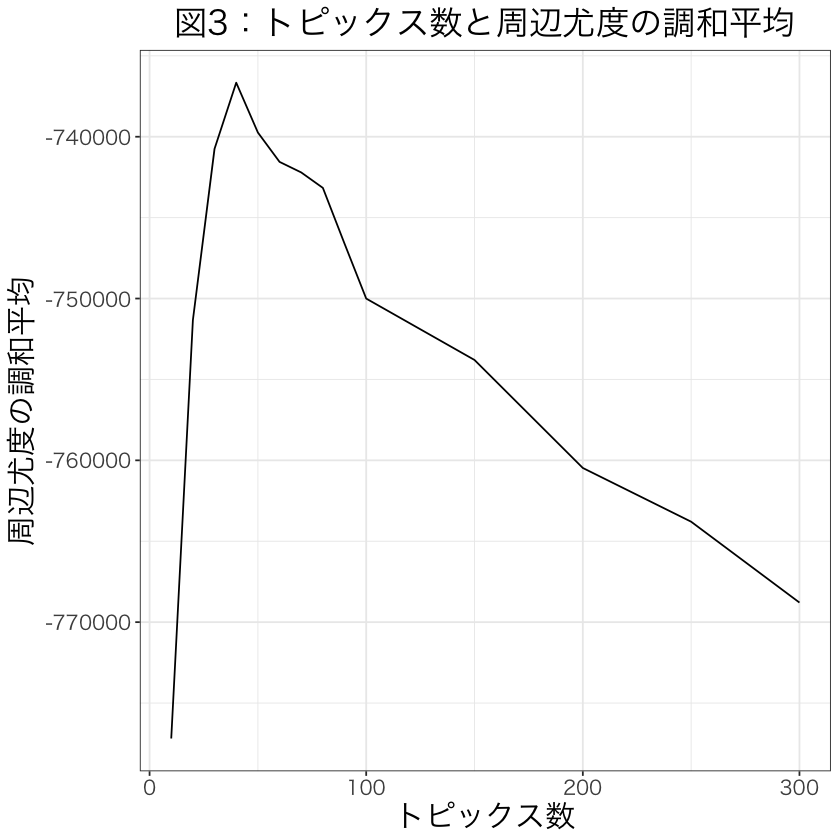

In [7]:
t = proc.time()
result <- pforeach(K = c(seq(10,100, by=10), 150, 200, 250, 300))({
		loglik_LDA(doc, vocab, K, iter=4000)
		})
proc.time()-t
K = c(seq(10,100, by=10), 150, 200, 250, 300)
gg_loglik(result, K)

    user   system  elapsed 
2976.631    8.261 2731.682 

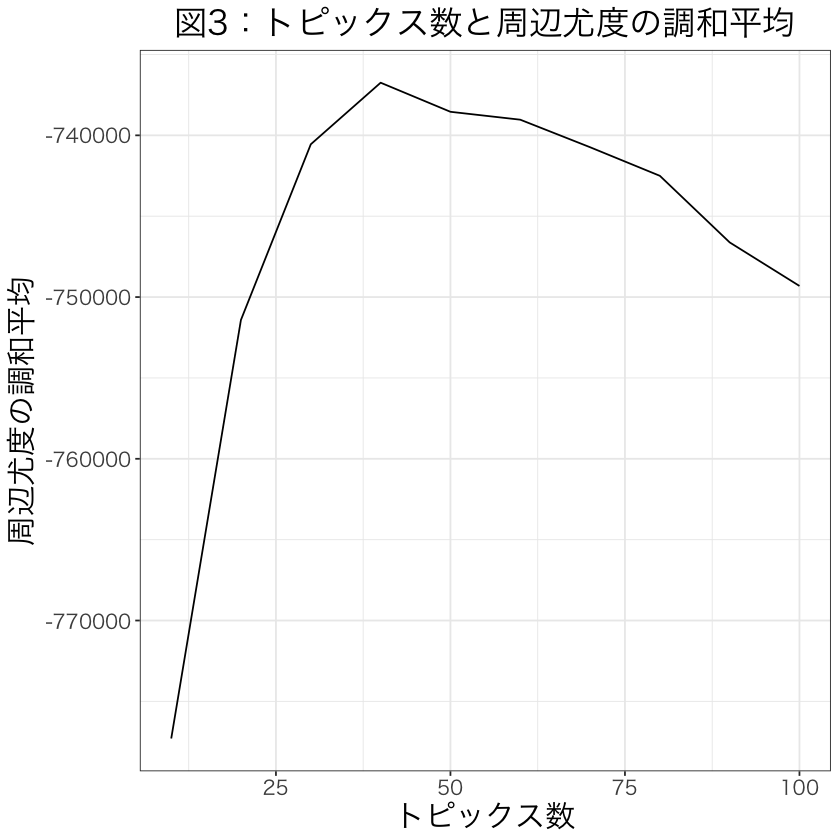

In [13]:
options(warn=-1)
t = proc.time()
result <- pforeach(K = c(seq(10,100, by=10)))({
		loglik_LDA(doc, vocab, K, iter=2000)
		})
proc.time()-t

K = c(seq(10,100, by=10))
gg_loglik(result, K)

## トピック数40


In [6]:
t <- proc.time()
k = 40
set.seed(123)
result2 <- lda.collapsed.gibbs.sampler(doc, 
                                       k,
                                       vocab,
                         
                                       
                                       2000,  # 繰り返し数
                                       0.1, # ディリクレ過程のハイパーパラメータα
                                       0.01, # ディリクレ過程のハイパーパラメータη
                                       compute.log.likelihood=TRUE)
proc.time() - t

   user  system elapsed 
246.176   0.471 250.642 

## 結果の解釈

In [7]:
top.words <- top.topic.words(result2$topics, 50, by.score=T)

In [9]:
valid <- c(1, 2, 5, 6, 7, 9, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 24, 25, 27, 30, 31, 33, 34, 35, 36, 37, 40)
topic_name <- c("車",
                "ターミナル内移動",
                "ターミナル宿泊",
                "ユニバーサルデザイン",
                "チェックイン列",
                "セキュリティ",
                "荷物受け取り",
                "セキュリティチェック列",
                "ラグジュアリー",
                "スタッフへの問い合わせ",
                "ショッピング",
                "トランジット",
                "飲み物",
                "言語&案内",
                "電子機器",
                "入国審査列",
                "施設全体",
                "陸上交通",
                "ターミナル間移動",
                "荷物検査",
                "入国審査列2",
                "トイレ",
                "スタッフの役立ちさ",
                "支払い",
                "デザイン",
                "遅延",
                "スタッフの態度"
                )

#### 使えそうなトピック

In [119]:
useful_topic <- top.words[1:20, valid]
colnames(useful_topic) <- topic_name
useful_topic
output <- data.frame(words=apply(useful_topic[1:10,c(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 15, 16, 18, 19, 21, 22, 23, 26, 27, 11, 14, 17, 20, 24, 25)], 2, paste, collapse=", "))
write.csv(output, "good_top_words.csv", fileEncoding="cp932")

車,ターミナル内移動,ターミナル宿泊,ユニバーサルデザイン,チェックイン列,セキュリティ,荷物受け取り,セキュリティチェック列,ラグジュアリー,スタッフへの問い合わせ,⋯,陸上交通,ターミナル間移動,荷物検査,入国審査列2,トイレ,スタッフの役立ちさ,支払い,デザイン,遅延,スタッフの態度
car,gate,transit,airport,minute,security,immigration,time,lounge,staff,⋯,train,terminal,immigration,line,terminal,airport,food,airport,flight,staff
terminal,walk,hour,staff,departure,check,baggage,line,business,service,⋯,airport,international,arrival,immigration,toilet,staff,card,great,hour,security
bus,easy,place,assistance,terminal,go,minute,security,class,desk,⋯,city,domestic,baggage,long,old,friendly,cheap,clean,delay,pleasant
park,signage,shower,child,gate,time,bag,check,airport,do,⋯,bus,flight,quick,departure,clean,efficient,beer,design,arrive,helpful
taxi,long,lounge,get,passport,luggage,luggage,long,security,check,⋯,station,transfer,departure,arrival,use,clean,expensive,india,time,experience
parking,sign,area,service,security,bag,take,hour,first,customer,⋯,good,bus,area,counter,improvement,easy,choice,good,minute,rude
floor,terminal,hotel,people,line,do,custom,flight,world,airline,⋯,express,time,security,officer,year,find,price,time,wait,courteous
take,area,spend,family,check,get,arrive,take,nice,airport,⋯,shuttle,plenty,check-in,arrive,facility,helpful,pay,beautiful,morning,polite
arrival,train,flight,person,take,point,belt,minute,star,information,⋯,transport,area,check,check-in,new,facility,customer,experience,problem,people
rental,distance,room,wheelchair,arrival,walk,arrival,get,economy,help,⋯,public,gate,efficient,taxi,more,experience,local,modern,gate,professional


#### 使えなさそうなトピック

In [71]:
top.words[1:20, -valid]

terminal,year,airport,airport,passenger,airport,terminal,terminal,immigration,airport,terminal
london,time,good,passenger,find,do,nice,shop,custom,air,security
good,last,other,time,gate,people,lot,airline,usa,passenger,go
experience,airport,world,other,line,other,shop,good,line,international,line
security,long,usa,make,go,thing,view,main,officer,china,long
south,good,most,immigration,flight,seem,fly,flight,experience,new,fly
north,past,clean,use,machine,traveller,restaurant,bit,get,smoking,nice
british_airways,few,hub,reach,people,many,high,other,agent,other,experience
fly,trip,europe,international,way,only,thing,use,friendly,transfer,connection
short,many,major,service,tell,see,eatery,low,tsa,room,american
pleasant,problem,see,improve,change,travel,only,train,arrive,part,usa


In [11]:
topic_param <- get_topic_param(result2$document_sums[valid,])
rownames(topic_param) <- topic_name
modeled_data <- cbind(rec_target_data, t(topic_param))

In [105]:
write.csv(modeled_data[,20:46], "modeled_data_good.csv", row.names=F)

## 空港ごとのトピック傾向

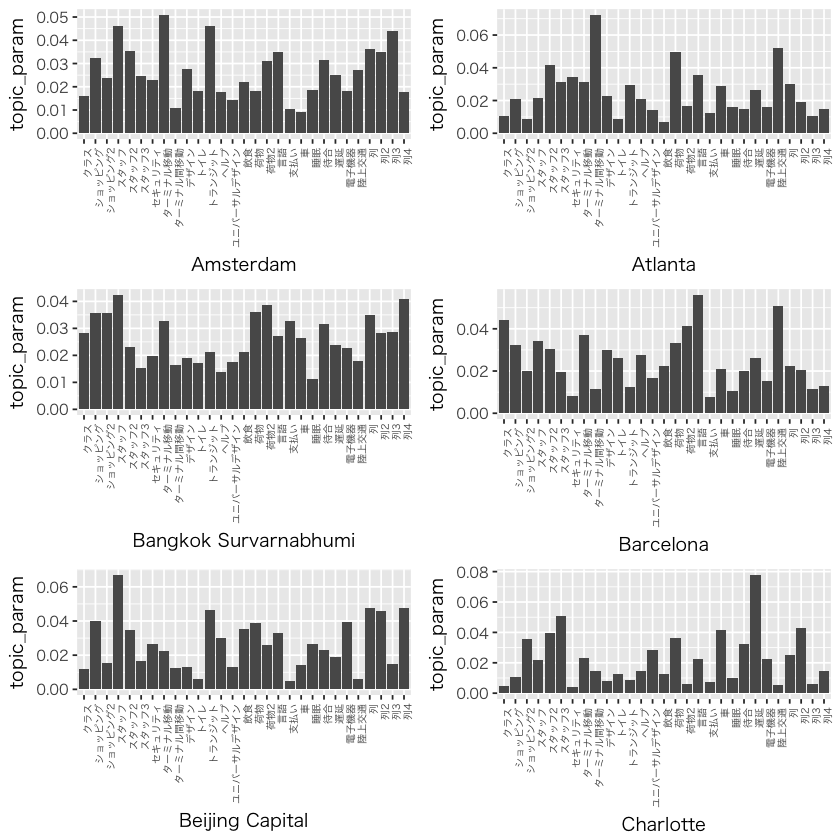

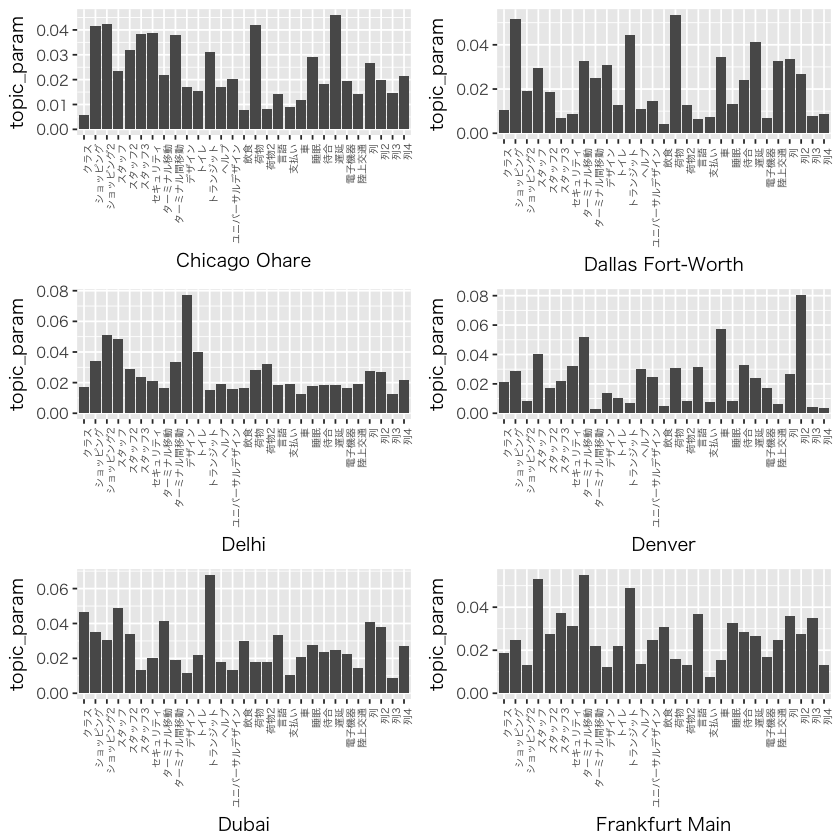

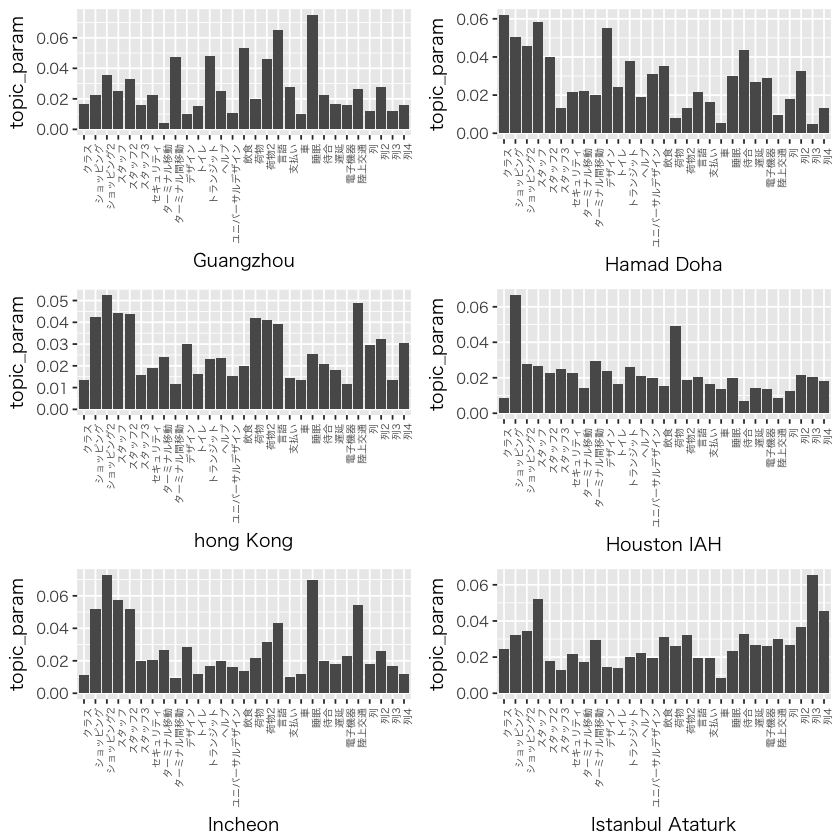

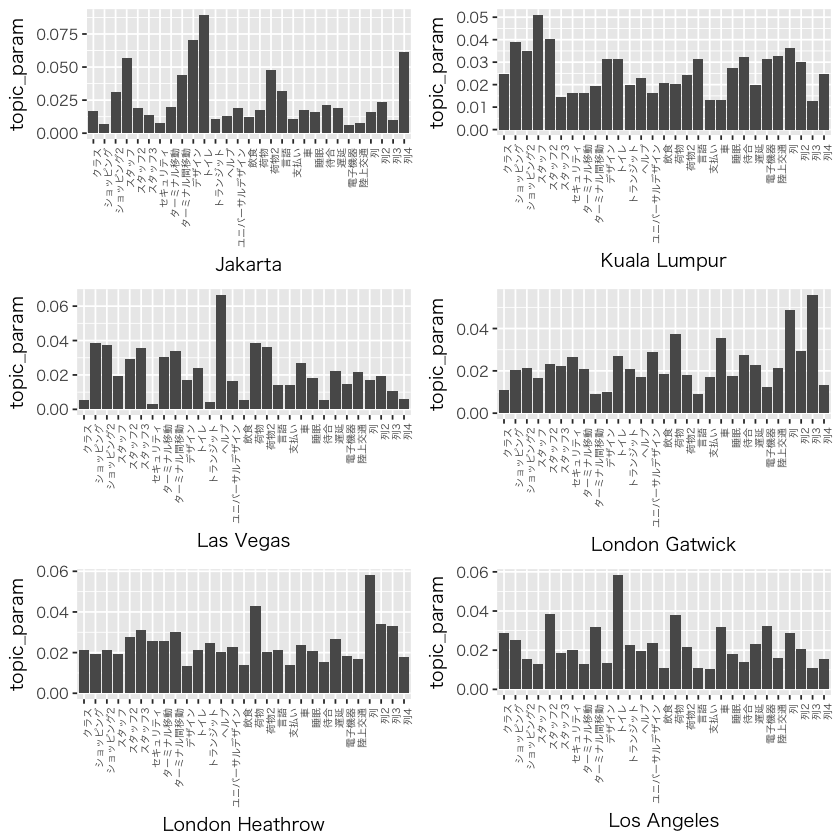

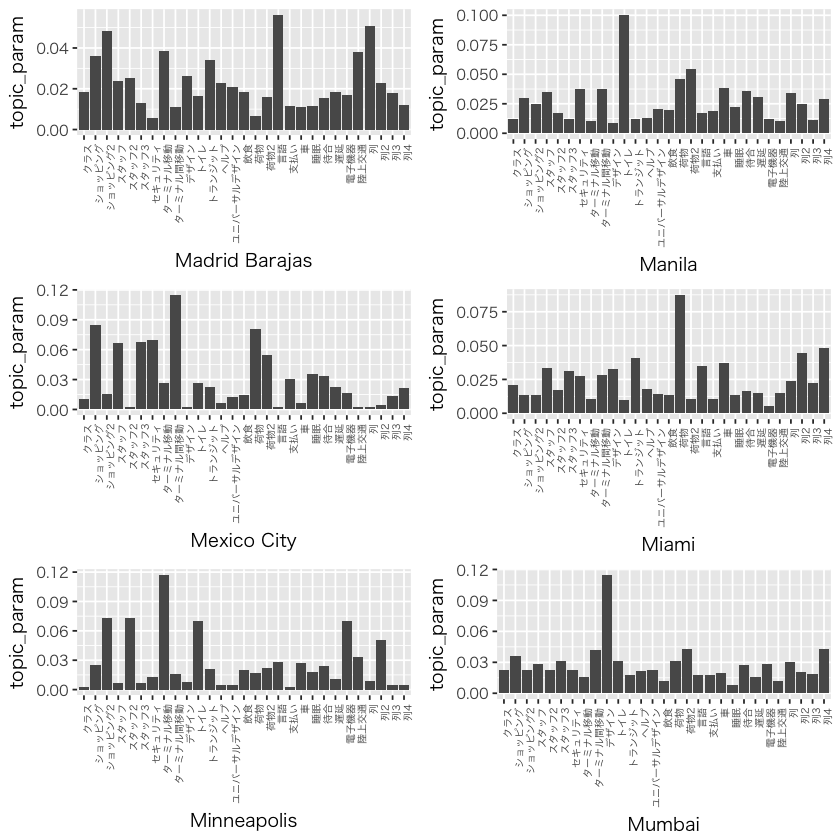

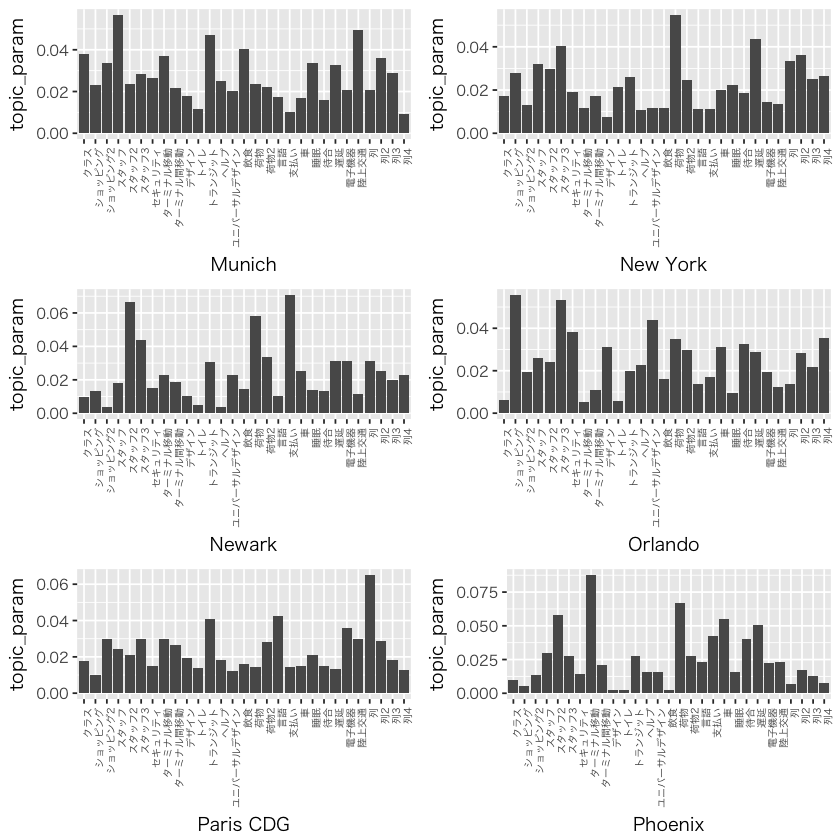

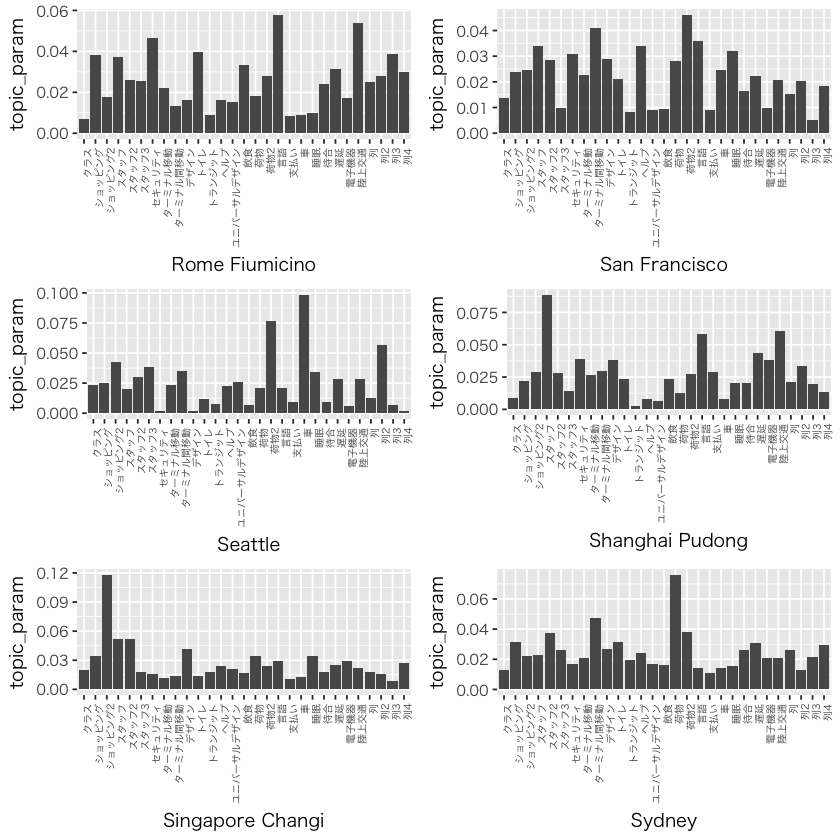

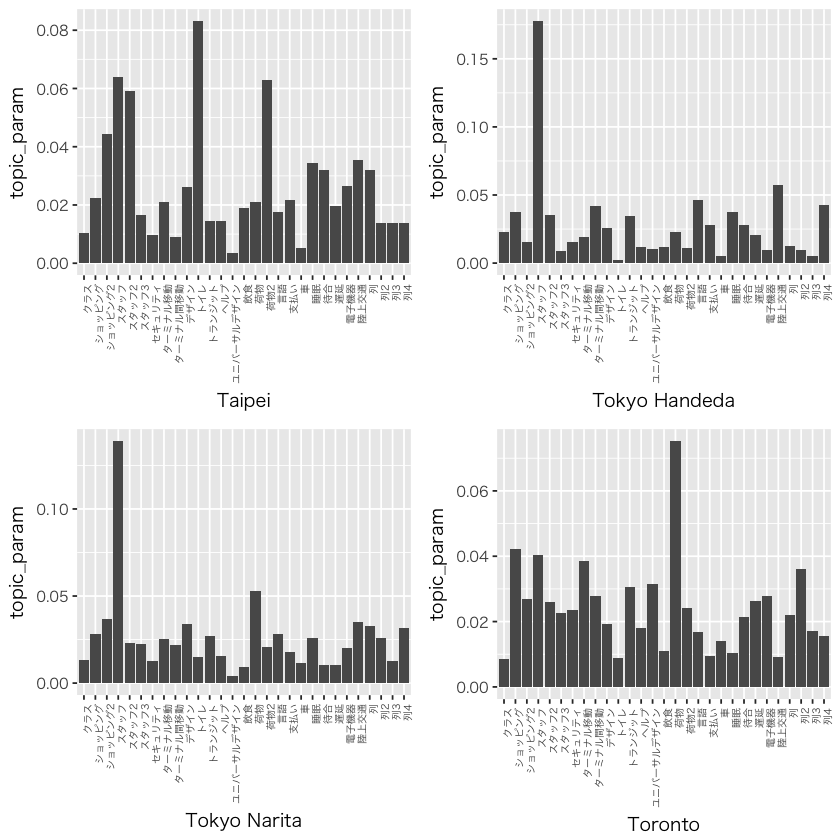

In [73]:
k <- 40
topic_mean_airport <- t(aggregate(modeled_data[,20:(20 + k - 1)], list(modeled_data$airport), mean))
airport_name <- topic_mean_airport[1,]
colnames(topic_mean_airport) <- topic_mean_airport[1,]
topic_mean_airport <- topic_mean_airport[-1, ]  # １行目は空港名なので除外
topic_mean_airport <- topic_mean_airport[valid, ] # 扱いたいトピックを抽出
rownames(topic_mean_airport) <- topic_name
topic_plot <- list()
for (i in 1:ncol(topic_mean_airport)){
    plot_data<- data.frame(x=topic_name, topic_param=as.numeric(topic_mean_airport[,i]))
    topic_plot[[i]] <- ggplot(plot_data, aes(x, topic_param)) +
                    geom_bar(stat = "identity") +
                    labs(x=airport_name[i]) +
                    theme_gray(base_family = "HiraKakuPro-W3") +
                    theme(axis.text.x = element_text(angle = 90, hjust = 1, size=6))
    
}

layout <- rbind(c(1, 2), c(3, 4), c(5, 6))
grid.arrange(topic_plot[[1]],
             topic_plot[[2]],
             topic_plot[[3]],
             topic_plot[[4]],
             topic_plot[[5]],
             topic_plot[[6]],
             layout_matrix = layout)

layout <- rbind(c(1, 2), c(3, 4), c(5, 6))
grid.arrange(topic_plot[[7]],
             topic_plot[[8]],
             topic_plot[[9]],
             topic_plot[[10]],
             topic_plot[[11]],
             topic_plot[[12]],
             layout_matrix = layout)

layout <- rbind(c(1, 2), c(3, 4), c(5, 6))
grid.arrange(topic_plot[[13]],
             topic_plot[[14]],
             topic_plot[[15]],
             topic_plot[[16]],
             topic_plot[[17]],
             topic_plot[[18]],
             layout_matrix = layout)

layout <- rbind(c(1, 2), c(3, 4), c(5, 6))
grid.arrange(topic_plot[[19]],
             topic_plot[[20]],
             topic_plot[[21]],
             topic_plot[[22]],
             topic_plot[[23]],
             topic_plot[[24]],
             layout_matrix = layout)

layout <- rbind(c(1, 2), c(3, 4), c(5, 6))
grid.arrange(topic_plot[[25]],
             topic_plot[[26]],
             topic_plot[[27]],
             topic_plot[[28]],
             topic_plot[[29]],
             topic_plot[[30]],
             layout_matrix = layout)

layout <- rbind(c(1, 2), c(3, 4), c(5, 6))
grid.arrange(topic_plot[[31]],
             topic_plot[[32]],
             topic_plot[[33]],
             topic_plot[[34]],
             topic_plot[[35]],
             topic_plot[[36]],
             layout_matrix = layout)

layout <- rbind(c(1, 2), c(3, 4), c(5, 6))
grid.arrange(topic_plot[[37]],
             topic_plot[[38]],
             topic_plot[[39]],
             topic_plot[[40]],
             topic_plot[[41]],
             topic_plot[[42]],
             layout_matrix = layout)

layout <- rbind(c(1, 2), c(3, 4))
grid.arrange(topic_plot[[43]],
             topic_plot[[44]],
             topic_plot[[45]],
             topic_plot[[46]],
             layout_matrix = layout)